In [63]:
# Import libraries
import pandas_datareader.data as web 
import datetime as dt   
import pandas as pd   
from matplotlib import style     
import numpy as np   
import yfinance as yfin 
import matplotlib.pyplot as plt



In [64]:
# Read Data
data = pd.read_csv("./crypto.csv", index_col='Date')
tickers = ['BTC-USD', 'ETH-USD', 'LTC-USD']

In [65]:
returns = data.pct_change().dropna()
returns

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2018-01-02,0.097011,0.144699,0.116360
2018-01-03,0.014611,0.088508,-0.040324
2018-01-04,0.026196,0.018905,-0.016302
2018-01-05,0.117333,0.017127,0.032730
2018-01-06,0.005594,0.044060,0.189273
...,...,...,...
2023-03-16,0.027766,0.012704,0.034280
2023-03-17,0.094646,0.068727,0.081594
2023-03-18,-0.016703,-0.017200,-0.029474


In [71]:
crypto_return = returns
crypto_return.to_csv('return.csv')

In [66]:
number_of_portfolios = 100
RF = 0.0

portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []

In [67]:
for portfolio in range(number_of_portfolios):
    #Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights/np.sum(weights)),3)
    portfolio_weights.append(weights)
    
    #Calculate annualized return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_returns.append(annualized_return)
    #Matrix covariance & portfolio risks calculation
    matrix_covariance = returns.cov()*252
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    #sharp ratio
    sharpe_ratio = annualized_return-RF/ portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)
    print(portfolio_returns)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
sharpe_ratio = np.array(sharpe_ratios)

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'weights']
print(portfolios_df)

[0.2904238156468096]
[0.2904238156468096, 0.32387782448821245]
[0.2904238156468096, 0.32387782448821245, 0.26852005026309783]
[0.2904238156468096, 0.32387782448821245, 0.26852005026309783, 0.3108095220102949]
[0.2904238156468096, 0.32387782448821245, 0.26852005026309783, 0.3108095220102949, 0.29691380258697775]
[0.2904238156468096, 0.32387782448821245, 0.26852005026309783, 0.3108095220102949, 0.29691380258697775, 0.246335679911112]
[0.2904238156468096, 0.32387782448821245, 0.26852005026309783, 0.3108095220102949, 0.29691380258697775, 0.246335679911112, 0.3020865116181266]
[0.2904238156468096, 0.32387782448821245, 0.26852005026309783, 0.3108095220102949, 0.29691380258697775, 0.246335679911112, 0.3020865116181266, 0.3103112170706719]
[0.2904238156468096, 0.32387782448821245, 0.26852005026309783, 0.3108095220102949, 0.29691380258697775, 0.246335679911112, 0.3020865116181266, 0.3103112170706719, 0.344391880669442]
[0.2904238156468096, 0.32387782448821245, 0.26852005026309783, 0.31080952201

In [68]:
#crypto_result = portfolios_df
#crypto_result.to_csv('crypto_portfolio.csv')

In [69]:
#checking the risk is minimum 
min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]

print('Lowest risk')
print(min_risk)
print(tickers)
print('')

print('Highest return')
print(highest_return)
print(tickers)
print('')

print('Highest sharpe ratio')
print(highest_sharpe)
print(tickers)
print('')

Lowest risk
Return                  0.287593
Risk                    0.608032
Sharpe                  0.287593
weights    [0.946, 0.053, 0.001]
Name: 73, dtype: object
['BTC-USD', 'ETH-USD', 'LTC-USD']

Highest return
Return                 0.406606
Risk                   0.766887
Sharpe                 0.406606
weights    [0.044, 0.925, 0.03]
Name: 87, dtype: object
['BTC-USD', 'ETH-USD', 'LTC-USD']

Highest sharpe ratio
Return                 0.406606
Risk                   0.766887
Sharpe                 0.406606
weights    [0.044, 0.925, 0.03]
Name: 87, dtype: object
['BTC-USD', 'ETH-USD', 'LTC-USD']



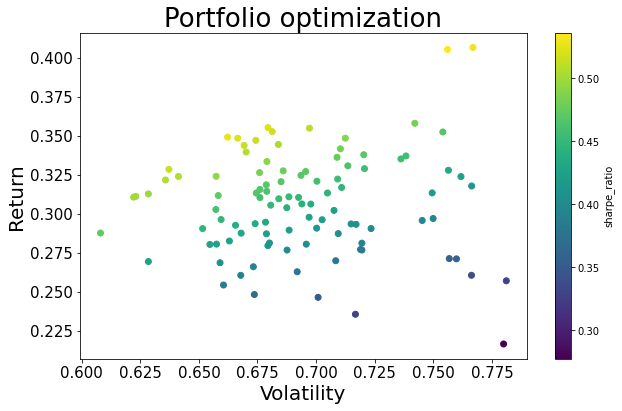

In [70]:
plt.figure(figsize = (10,6))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns/portfolio_risks)
plt.title('Portfolio optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'sharpe_ratio')